In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
def rmse_medida(true, pred):
    return np.sqrt(np.mean((true-pred)**2))

In [3]:
def mae_medida(true, pred):
    return np.mean(np.abs(true-pred))

# HOLT-WINTERS ADITIVO
### Involucra la presencia de nivel, tendencia y estacionalidad (heterocedasticidad)

In [4]:
df = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.index.freq = 'MS'

In [6]:
n_test = 12
periodos = 12
train = df.iloc[:-n_test]
test = df.iloc[-n_test:]

In [7]:
# Vector booleano de df donde me indica que parte del df pertenece a train y a test
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [8]:
# Crear un objeto para caso aditivo
holt_winters = ExponentialSmoothing(train['Passengers'],
                                    initialization_method='legacy-heuristic',
                                    trend = 'add', 
                                    seasonal = 'add',
                                    seasonal_periods = periodos)

In [9]:
# Obtener los resulados con parametros optimizados
res = holt_winters.fit()

In [10]:
df.loc[train_idx, 'HW_add'] = res.fittedvalues
df.loc[test_idx, 'HW_add']  = res.forecast(n_test)

<Axes: xlabel='Month'>

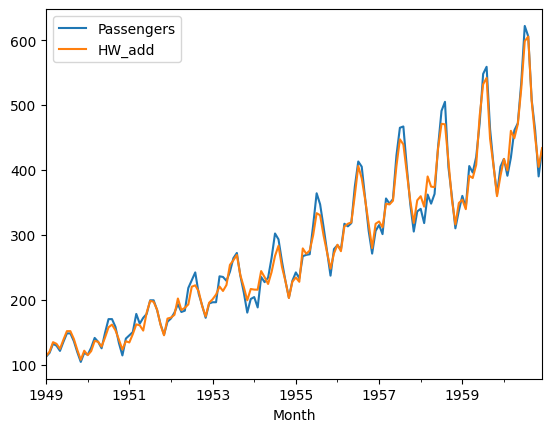

In [11]:
df[['Passengers', 'HW_add']].plot()

In [12]:
print(F"Train RMSE: {rmse_medida(train['Passengers'], res.fittedvalues)}")
print(F"Test RMSE: {rmse_medida(test['Passengers'], res.forecast(n_test))}")

print(F"Train MAE : {mae_medida(train['Passengers'], res.fittedvalues)}")
print(F"Test MAE : {mae_medida(test['Passengers'], res.forecast(n_test))}")

Train RMSE: 11.852990954957166
Test RMSE: 15.54310207126028
Train MAE : 8.892097558831734
Test MAE : 10.438195074990096


# HOLT-WINTERS ADITIVO con estacionalidad MULTIPLICATIVA
### Involucra la presencia de nivel, tendencia y estacionalidad (homocedasticidad)

In [13]:
df_2 = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df_2.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
df_2.index.freq = 'MS'

In [15]:
n_test = 12
periods = 12
train = df.iloc[:-n_test]
test = df.iloc[-n_test:]

In [16]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]
type(test_idx)

numpy.ndarray

In [17]:
holt_winters_2 = ExponentialSmoothing(train['Passengers'],
                                      initialization_method = 'legacy-heuristic',
                                      trend = 'add',
                                      seasonal = 'mul',
                                      seasonal_periods = periods)

In [18]:
res = holt_winters_2.fit()

In [19]:
df_2.loc[train_idx, 'HW_2'] = res.fittedvalues
df_2.loc[test_idx,  'HW_2'] = res.forecast(n_test)

<Axes: xlabel='Month'>

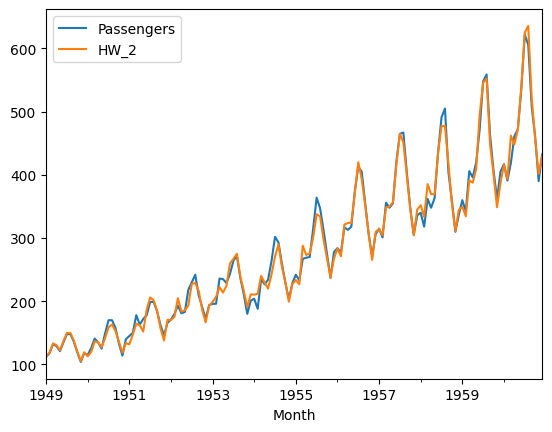

In [20]:
df_2[['Passengers', 'HW_2']].plot()

In [21]:
print(F"Train RMSE: {rmse_medida(train['Passengers'], res.fittedvalues)}")
print(F"Test RMSE: {rmse_medida(test['Passengers'], res.forecast(n_test))}")

print(F"Train MAE : {mae_medida(train['Passengers'], res.fittedvalues)}")
print(F"Test MAE : {mae_medida(test['Passengers'], res.forecast(n_test))}")

Train RMSE: 10.15393483898039
Test RMSE: 16.53521242785799
Train MAE : 7.552052605962818
Test MAE : 10.683341347861003


# HOLT-WINTERS multiplicativo
### Involucra la presencia de nivel, tendencia y estacionalidad (homocedasticidad)

In [22]:
df_3 = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df_3.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
df_3.index.freq = 'MS'

In [24]:
# Establecimiento de los conjuntos de entrenamiento y de pruebas
n_test = 12
periodos = 12
train = df.iloc[:-n_test]
test = df.iloc[-n_test :]

In [25]:
# Establecimiento de los indices
index_train = df.index <= train.index[-1]
index_test = df.index > train.index[-1]
type(index_test)

numpy.ndarray

In [26]:
# Creacion del objeto pero ahora todo es multiplicativo
hw_3 = ExponentialSmoothing(train['Passengers'],
                            initialization_method='legacy-heuristic',
                            trend = 'mul',
                            seasonal= 'mul',
                            seasonal_periods=periodos)

In [27]:
res = hw_3.fit()

In [28]:
df.loc[index_train, 'HW_3'] = res.fittedvalues
df.loc[index_test, 'HW_3'] = res.forecast(n_test)

<Axes: xlabel='Month'>

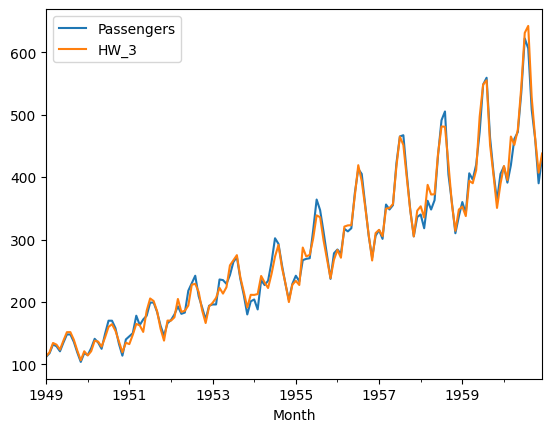

In [29]:
df[['Passengers', 'HW_3']].plot()

In [30]:
print(F"Train RMSE: {rmse_medida(train['Passengers'], res.fittedvalues)}")
print(F"Test RMSE: {rmse_medida(test['Passengers'], res.forecast(n_test))}")

print(F"Train MAE : {mae_medida(train['Passengers'], res.fittedvalues)}")
print(F"Test MAE : {mae_medida(test['Passengers'], res.forecast(n_test))}")

Train RMSE: 9.887178133880779
Test RMSE: 19.10211339345236
Train MAE : 7.408705814447217
Test MAE : 13.450536258870992
